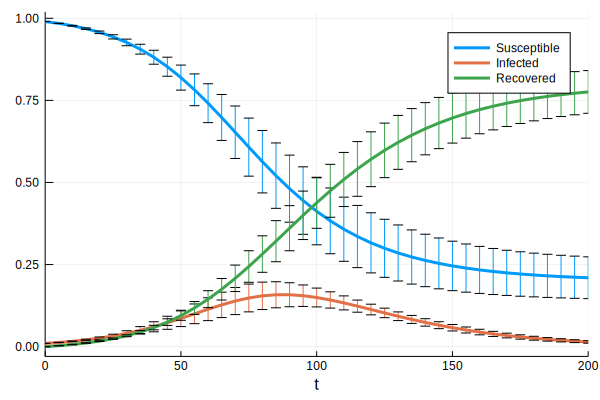

In [32]:
using DifferentialEquations, Plots, Measurements

function sir_ode!(du, u, p, t)
    
    S, I, R = u
    β, γ = p
    
    dS = -β*S*I
    dI = +β*S*I - γ*I
    dR = +γ*I
    
    du .= (dS, dI, dR)
end

β = 0.1±0.005
γ = 0.05±0.005

parameters = [β, γ]

S₀ = 0.99±0.0
I₀ = 0.01±0.0
R₀ = 0.0±0.0

initial_values = [S₀, I₀, R₀]

t_span = (0.0, 200.0)

problem = ODEProblem(sir_ode!, initial_values, t_span, parameters)

solution = solve(problem, saveat=5)
plot(solution, labels=["Susceptible" "Infected" "Recovered"])

In [33]:
solution(79)

3-element Array{Measurement{Float64},1}:
 0.572 ± 0.094
 0.153 ± 0.042
 0.274 ± 0.054